In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Loading and Preprocessing the dataset

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("data/magic04.data", names=cols)
df["class"] = (df["class"] == "g").astype("int8")
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Train, validation, test datasets

In [3]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

## Scaling and Over Sampling the dataset

In [4]:
def scale_dataset(dataframe: pd.DataFrame, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

In [5]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [6]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_valid).value_counts())
print(pd.Series(y_test).value_counts())

1    7395
0    7395
Name: count, dtype: int64
1    2489
0    1315
Name: count, dtype: int64
1    2448
0    1356
Name: count, dtype: int64


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = lg_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int8)

## Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1356
           1       0.84      0.82      0.83      2448

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



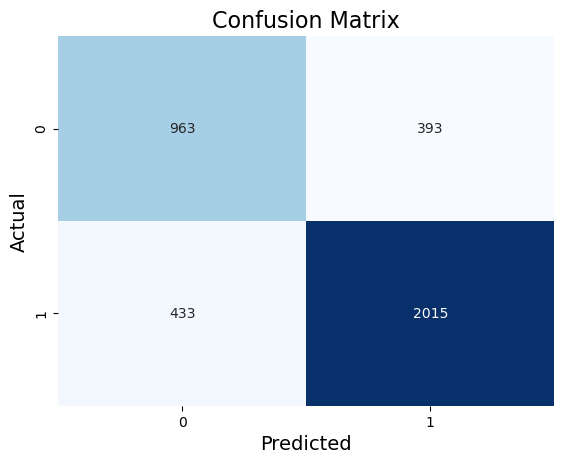

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);